In [2]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
property_data = pd.read_csv("../data/curated/cleaned_property_data.csv")

In [25]:
median_data = pd.read_csv("../data/raw/rental_median.csv")
median_data.shape

(177, 609)

In [15]:
# overview of whole VIC rental median

# median_data = median_data.columns.T.drop_duplicates().T
# Drop duplicate columns
median_data = median_data.loc[:, ~median_data.columns.duplicated()]
median_data.shape

(177, 603)

In [23]:
# check median data
median_data.head()

In [54]:
# classify different type, different time, different bad number rent median 

median_1b_flat_list =[]
# median_1b_house_list =[]

median_2b_flat_list =[]
median_2b_house_list =[]

median_3b_flat_list =[]
median_3b_house_list =[]
median_4b_house_list =[]

total_rent_median = []

for i in median_data.columns:
    # print(i)
    if "1b_flat" in i:
        median_1b_flat_list.append(i)
    # elif "1b_house" in i:
    #     median_1b_house_list.append(i)
    elif "2b_flat" in i:
        median_2b_flat_list.append(i)
    elif "2b_house" in i:
        median_2b_house_list.append(i)
    elif "3b_flat" in i:
        median_3b_flat_list.append(i)
    elif "3b_house" in i:
        median_3b_house_list.append(i)
    elif "4b_house" in i:
        median_4b_house_list.append(i)
    elif "Suburb" not in i:
        total_rent_median.append(i)



In [60]:
total_rent_media_df = pd.DataFrame()
total_rent_media_df = median_data[total_rent_median]
median_data["Suburb"]

0            Armadale
1       Carlton North
2           Docklands
3      East Melbourne
4       East St Kilda
            ...      
172           Newport
173         Spotswood
174         St Albans
175         Deer Park
176          Sunshine
Name: Suburb, Length: 177, dtype: object

In [61]:
total_rent_media_df["suburb"] = median_data["Suburb"]

<ipython-input-61-51f51f5fa22a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_rent_media_df["suburb"] = median_data["Suburb"]


In [62]:
total_rent_media_df.head()

,Rental_total_Mar_2000,Rental_total_Jun_2000,Rental_total_Sep_2000,Rental_total_Dec_2000,Rental_total_Mar_2001,Rental_total_Jun_2001,Rental_total_Sep_2001,Rental_total_Dec_2001,Rental_total_Mar_2002,Rental_total_Jun_2002,...,Rental_total_Jun_2019,Rental_total_Sep_2019,Rental_total_Dec_2019,Rental_total_Mar_2020,Rental_total_Jun_2020,Rental_total_Sep_2020,Rental_total_Dec_2020,Rental_total_Mar_2021,Rental_total_Jun_2021,suburb
0,200,200,205,210,215,220,225,230,235,230,...,480,480,485,500,500,500,495,450,440,Armadale
1,260,260,265,270,270,275,280,280,290,290,...,577,580,580,585,590,590,590,580,580,Carlton North
2,-,340,-,-,-,-,-,-,320,340,...,580,575,580,570,550,500,460,420,400,Docklands
3,265,268,280,273,290,295,300,320,320,320,...,500,520,550,550,550,515,495,450,450,East Melbourne
4,180,180,180,185,185,190,195,195,200,200,...,420,425,425,425,425,420,410,395,385,East St Kilda


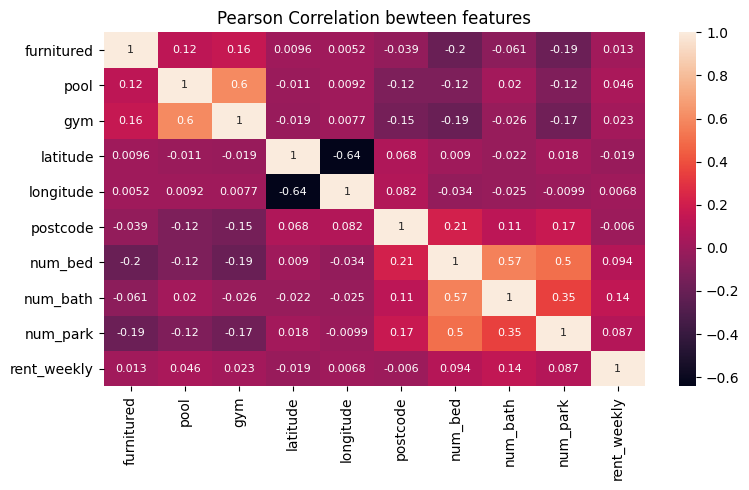

In [6]:
rent_inner = pd.read_csv('../data/curated/cleaned_rent.csv')
dic = {'Yes': 1,
        'No': 0}
rent_inner['furnitured'] = rent_inner['furnitured'].map(dic)
rent_inner['pool'] = rent_inner['pool'].map(dic)
rent_inner['gym'] = rent_inner['gym'].map(dic)
plt.figure(figsize=(8,5),dpi=100)
plt.title('Pearson Correlation bewteen features', fontsize=12)
sns.heatmap(rent_inner.corr(), annot=rent_inner.corr(), annot_kws={"fontsize":8})
plt.tight_layout()
plt.show()